In [1]:
%run load_data.ipynb

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
  0%|          | 0/116 [00:00<?, ?it/s]

(960, 540, 3)
plt.imshow(img)


 16%|█▋        | 19/116 [00:08<01:20,  1.21it/s]


KeyboardInterrupt: 

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

#import theano
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

## CNN Training parameters

In [13]:
batch_size = 16
nb_classes = 5
nb_epoch = 200

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

# number of convolutional filters to use at each layer
nb_filters = [64, 64]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [2, 2]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [3, 3]

# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /= np.max(train_set)

# Define Model

## Model_1

In [17]:
from keras.layers import Dense,Dropout,Conv3D,Input,MaxPool3D,Flatten,Activation
from keras.regularizers import l2
from keras.models import Model

input_shape = (3,112,112,16) ##channel first ##channel,spatial_dim1, spatial_dim2, spatial_dim3,
weight_decay = 0.005
nb_classes = 5

model = Sequential()

model.add(Conv3D(64,(3,3,3),strides=(1,1,1), input_shape= input_shape, name='conv1', padding='same',data_format="channels_first", activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,1),strides=(2,2,1), name='pool1',padding='same',data_format="channels_first"))

model.add(Conv3D(128,(3,3,3),strides=(1,1,1), name='conv2',padding='same',data_format="channels_first",activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool2',padding='same',data_format="channels_first"))

model.add(Conv3D(128,(3,3,3),strides=(1,1,1), name='conv3',padding='same',data_format="channels_first",activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool3',padding='same',data_format="channels_first"))

model.add(Conv3D(256,(3,3,3),strides=(1,1,1), name='conv4',padding='same',data_format="channels_first",activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool4',padding='same',data_format="channels_first"))

model.add(Conv3D(256,(3,3,3),strides=(1,1,1), name='conv5',padding='same',data_format="channels_first",activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool5',padding='same',data_format="channels_first"))


#fully connected layer
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.5))
model.add(Dense(2048,activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax',kernel_regularizer=l2(weight_decay)))

print(model.summary())
#opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 64, 112, 112, 16)  5248      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 64, 56, 56, 16)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 128, 56, 56, 16)   221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 128, 28, 28, 8)    0         
_________________________________________________________________
conv3 (Conv3D)               (None, 128, 28, 28, 8)    442496    
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 128, 14, 14, 4)    0         
_________________________________________________________________
conv4 (Conv3D)               (None, 256, 14, 14, 4)    884992    
__________

# Model_2

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D
from keras.optimizers import SGD

model = Sequential()

# 1st layer group
model.add(Conv3D(64, (3, 3, 3), activation='relu',padding='same', name='conv1',input_shape=input_shape,data_format="channels_first"))
model.add(MaxPool3D(pool_size=(2, 2, 1), strides=(2, 2, 1), padding='valid', name='pool1',data_format="channels_first"))

# 2nd layer group
model.add(Conv3D(128, (3, 3, 3), activation='relu',padding='same', name='conv2',data_format="channels_first"))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='valid', name='pool2',data_format="channels_first"))

# 3rd layer group
model.add(Conv3D(256, (3, 3, 3), activation='relu',padding='same', name='conv3a',data_format="channels_first"))
model.add(Conv3D(256, (3, 3, 3), activation='relu',padding='same', name='conv3b',data_format="channels_first"))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='valid', name='pool3',data_format="channels_first"))
    
# 4th layer group
model.add(Conv3D(512, (3, 3, 3), activation='relu',padding='same', name='conv4a',data_format="channels_first"))
model.add(Conv3D(512, (3, 3, 3), activation='relu',padding='same', name='conv4b',data_format="channels_first"))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='valid', name='pool4',data_format="channels_first"))
    
# 5th layer group
model.add(Conv3D(512, (3, 3, 3), activation='relu',padding='same', name='conv5a',data_format="channels_first"))
model.add(Conv3D(512, (3, 3, 3), activation='relu', padding='same', name='conv5b',data_format="channels_first"))
model.add(ZeroPadding3D(padding=((0, 0), (0, 1), (0, 1)), name='zeropad5',data_format="channels_first"))
model.add(MaxPool3D(pool_size=(2, 2, 2), strides=(2, 2, 2),padding='valid', name='pool5',data_format="channels_first"))
model.add(Flatten())
    
# FC layers group
model.add(Dense(4096, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(4096, activation='relu', name='fc7'))
model.add(Dropout(.5))
model.add(Dense(5, activation='softmax', name='fc8'))

print(model.summary())
#opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 64, 112, 112, 16)  5248      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 64, 56, 56, 16)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 128, 56, 56, 16)   221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 128, 28, 28, 8)    0         
_________________________________________________________________
conv3a (Conv3D)              (None, 256, 28, 28, 8)    884992    
_________________________________________________________________
conv3b (Conv3D)              (None, 256, 28, 28, 8)    1769728   
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 256, 14, 14, 4)    0         
__________

## Model_3

In [19]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model = Sequential()

# Adding Alternate convolutional and pooling layers
model.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', input_shape=input_shape,data_format="channels_first"))
model.add(MaxPooling3D(pool_size=(2, 2, 1), strides=(2, 2, 1), padding='same',data_format="channels_first"))

model.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu',data_format="channels_first"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same',data_format="channels_first"))

model.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu',data_format="channels_first"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same',data_format="channels_first"))

model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu',data_format="channels_first"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same',data_format="channels_first"))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model.add(GlobalAveragePooling3D())

# Hidden layer
model.add(Dense(32, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 16, 112, 112, 16)  2176      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 16, 56, 56, 16)    0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 64, 55, 54, 14)    18496     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 64, 28, 27, 7)     0         
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 256, 27, 25, 5)    295168    
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 256, 14, 13, 3)    0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 1024, 13, 11, 1)   4719616   
__________

## split data

In [129]:
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [130]:
# Use ModelCheckpoint to save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'C3D_model_new.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=200, verbose=1)


hist = model.fit(X_train_new, y_train_new, 
                 validation_data=(X_val_new,y_val_new),
                 batch_size=batch_size,
                 epochs = nb_epoch, 
                 shuffle=True, 
                 callbacks=[checkpoint, earlystop])

Train on 592 samples, validate on 149 samples
Epoch 1/50
592/592 [==============================] - 11s 19ms/step - loss: 7.9949 - acc: 0.2568 - val_loss: 2.9308 - val_acc: 0.2953

Epoch 00001: val_loss improved from inf to 2.93083, saving model to /home/jovyan/project/saved_models/C3D_model_new.h5
Epoch 2/50
592/592 [==============================] - 7s 12ms/step - loss: 2.3277 - acc: 0.2399 - val_loss: 1.8659 - val_acc: 0.2953

Epoch 00002: val_loss improved from 2.93083 to 1.86590, saving model to /home/jovyan/project/saved_models/C3D_model_new.h5
Epoch 3/50
592/592 [==============================] - 7s 12ms/step - loss: 1.7376 - acc: 0.2517 - val_loss: 1.6263 - val_acc: 0.2953

Epoch 00003: val_loss improved from 1.86590 to 1.62632, saving model to /home/jovyan/project/saved_models/C3D_model_new.h5
Epoch 4/50
592/592 [==============================] - 7s 11ms/step - loss: 1.6299 - acc: 0.2635 - val_loss: 1.6008 - val_acc: 0.2953

Epoch 00004: val_loss improved from 1.62632 to 1.600

In [131]:
# loading our save model
print("Loading trained model")
model = load_model(model_path)

Loading trained model


In [132]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

149/149 [==============================] - 1s 6ms/step
Test score: 1.5897984240679133
Test accuracy: 0.29530201382285


['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']
['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']


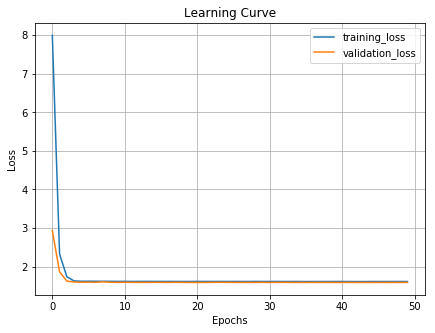

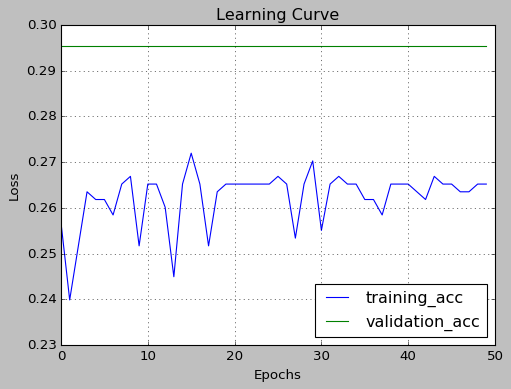

In [133]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [140]:
import itertools
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [141]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [142]:
preds = model.predict(X_val_new)

In [136]:
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_val_new)

Epoch 1/1
592/592 [==============================] - 8s 13ms/step - loss: 1.6119 - acc: 0.2652


In [137]:
a = np.argmax(y_val_new, axis=1)
b = np.argmax(y_pred, axis=1)
met = confusion_matrix(np.argmax(y_val_new,axis =1), np.argmax(model.predict(X_val_new),axis =1))
print(met)

[[ 0 22  0  0  0]
 [ 0 44  0  0  0]
 [ 0 22  0  0  0]
 [ 0 21  0  0  0]
 [ 0 40  0  0  0]]


Normalized confusion matrix
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


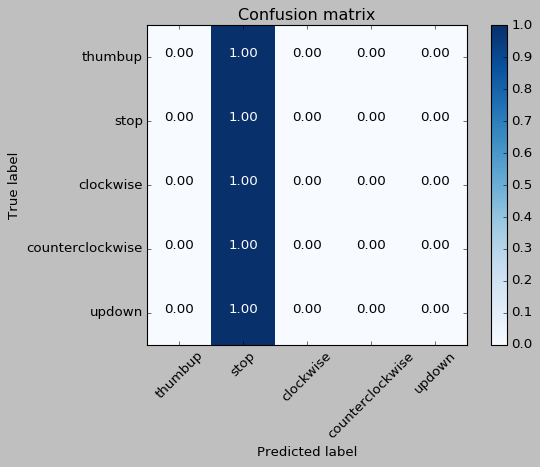

In [147]:
confusion_matrix_plot(met, normalize=True, classes=['thumbup', 'stop', 'clockwise', 'counterclockwise', 'updown'])